In [1]:
import sys

We do the pythonpath update instead of a proper install because we need other data files from the repo that aren't properly installed.

In [22]:
import torch
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

In [4]:
zoe = torch.hub.load("ZoeDepth", "ZoeD_N", source="local", pretrained=True)

img_size [384, 512]


Using cache found in /home/erik/.cache/torch/hub/intel-isl_MiDaS_master
/home/erik/3dprinting/hthv4_egg_waffle_logo3d/.pixi/envs/default/lib/python3.12/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1730824440083/work/aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt
Loaded successfully


In [17]:
# Zoe_N
model_zoe_n = torch.hub.load("ZoeDepth", "ZoeD_N", source="local", pretrained=True)

# Zoe_K
model_zoe_k = torch.hub.load("ZoeDepth", "ZoeD_K", source="local", pretrained=True)

# Zoe_NK
model_zoe_nk = torch.hub.load("ZoeDepth", "ZoeD_NK", source="local", pretrained=True)

img_size [384, 512]


Using cache found in /home/erik/.cache/torch/hub/intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt
Loaded successfully
Overwriting config with config_version kitti
img_size [384, 768]


Using cache found in /home/erik/.cache/torch/hub/intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  768
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_K.pt


Downloading: "https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_K.pt" to /home/erik/.cache/torch/hub/checkpoints/ZoeD_M12_K.pt
100%|██████████████████████████████████████| 1.34G/1.34G [04:17<00:00, 5.61MB/s]


Loaded successfully
img_size [384, 512]


Using cache found in /home/erik/.cache/torch/hub/intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt


/home/erik/3dprinting/hthv4_egg_waffle_logo3d/.pixi/envs/default/lib/python3.12/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
Downloading: "https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt" to /home/erik/.cache/torch/hub/checkpoints/ZoeD_M12_NK.pt
100%|██████████████████████████████████████| 1.35G/1.35G [06:03<00:00, 3.99MB/s]


Loaded successfully


In [9]:
im_hth3 = Image.open('hth3_background.jpg')

CPU times: user 1min 5s, sys: 2.72 ms, total: 1min 5s
Wall time: 25.5 s


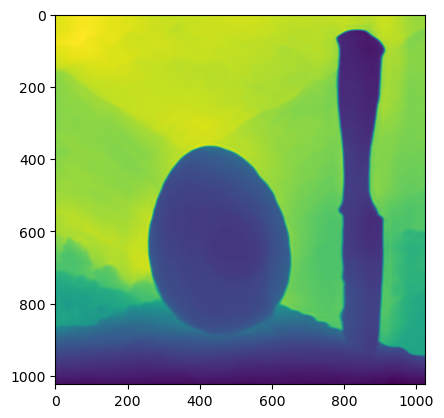

In [18]:
%%time

depth_n = model_zoe_n.infer_pil(im_hth3, output_type='numpy')
plt.imshow(depth_n)

CPU times: user 2min 30s, sys: 38.1 s, total: 3min 8s
Wall time: 1min 25s


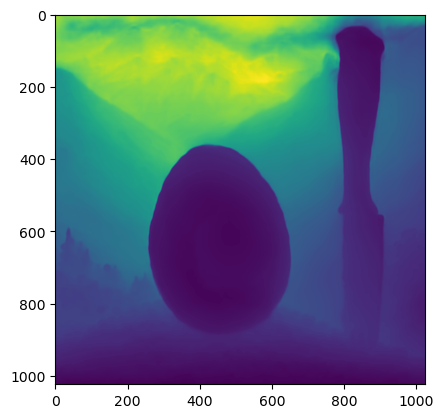

In [19]:
%%time

depth_k = model_zoe_k.infer_pil(im_hth3, output_type='numpy')
plt.imshow(depth_k)

CPU times: user 1min 2s, sys: 5.04 s, total: 1min 7s
Wall time: 25.7 s


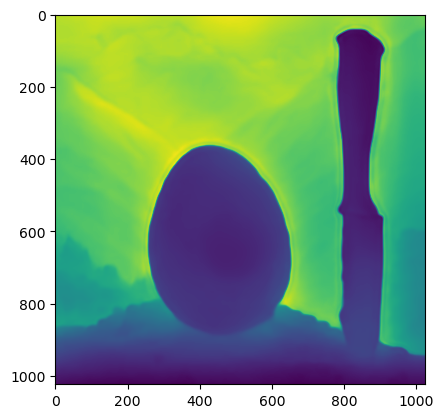

In [20]:
%%time

depth_nk = model_zoe_nk.infer_pil(im_hth3, output_type='numpy')
plt.imshow(depth_nk)

In [44]:
normed_depth = (depth_k - np.min(depth_k)) / np.ptp(depth_k)

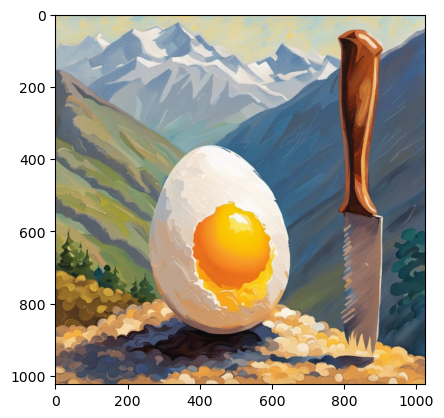

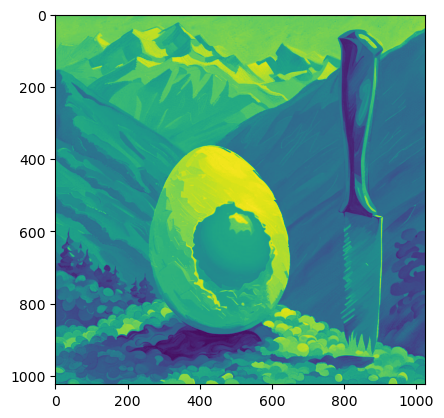

In [37]:
arr_hth3 = np.array(im_hth3)/255
arr_hth3_grey = np.mean(arr_hth3, axis=-1)

plt.figure()
plt.imshow(arr_hth3)

plt.figure()
plt.imshow(arr_hth3_grey)

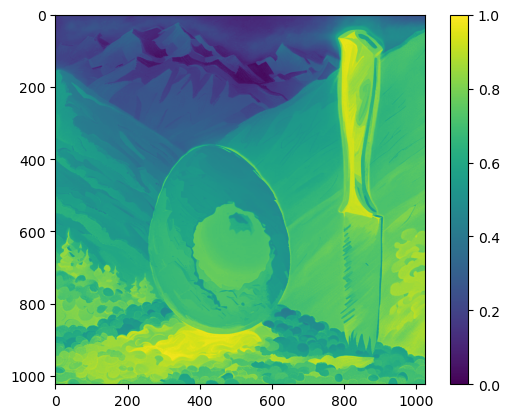

In [55]:
rescaled_burn = -(normed_depth + arr_hth3_grey)
rescaled_burn = (rescaled_burn-np.min(rescaled_burn)) / np.ptp(rescaled_burn)

plt.imshow(rescaled_burn)
plt.colorbar()